In [1]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 6.4 MB/s eta 0:00:00


# **Task 1**


In [2]:
#Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder

import shap

In [3]:
df = pd.read_csv('/content/training.csv')
test = pd.read_csv('/content/testing.csv')

In [4]:
print(df.shape)
print(test.shape)

(212, 14)
(91, 13)


In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,48,1,2,124,255,1,1,175,0,0.0,2,2,2,1
1,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
2,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
3,60,1,0,130,253,0,1,144,1,1.4,2,1,3,0
4,43,1,0,115,303,0,1,181,0,1.2,1,0,2,1


In [6]:
df.shape

(212, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       212 non-null    int64  
 1   sex       212 non-null    int64  
 2   cp        212 non-null    int64  
 3   trestbps  212 non-null    int64  
 4   chol      212 non-null    int64  
 5   fbs       212 non-null    int64  
 6   restecg   212 non-null    int64  
 7   thalach   212 non-null    int64  
 8   exang     212 non-null    int64  
 9   oldpeak   212 non-null    float64
 10  slope     212 non-null    int64  
 11  ca        212 non-null    int64  
 12  thal      212 non-null    int64  
 13  target    212 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 23.3 KB


In [8]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
print("\n Summary statistics of the dataset")
print(df.describe())


 Summary statistics of the dataset
              age         sex          cp    trestbps        chol         fbs  \
count  212.000000  212.000000  212.000000  212.000000  212.000000  212.000000   
mean    54.561321    0.688679    0.915094  132.127358  247.830189    0.165094   
std      9.493376    0.464130    1.008193   17.440700   53.199877    0.372144   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.000000    0.000000    0.000000  120.000000  211.750000    0.000000   
50%     57.000000    1.000000    1.000000  130.000000  240.500000    0.000000   
75%     61.250000    1.000000    2.000000  140.000000  277.000000    0.000000   
max     77.000000    1.000000    3.000000  192.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  212.000000  212.000000  212.000000  212.000000  212.000000  212.000000   
mean     0.537736  148.995283    0.330189    1.008491    1.448113    0.7

In [10]:
df.nunique()

age          40
sex           2
cp            4
trestbps     46
chol        134
fbs           2
restecg       3
thalach      82
exang         2
oldpeak      36
slope         3
ca            5
thal          4
target        2
dtype: int64


 Count of classes
1    115
0     97
Name: target, dtype: int64


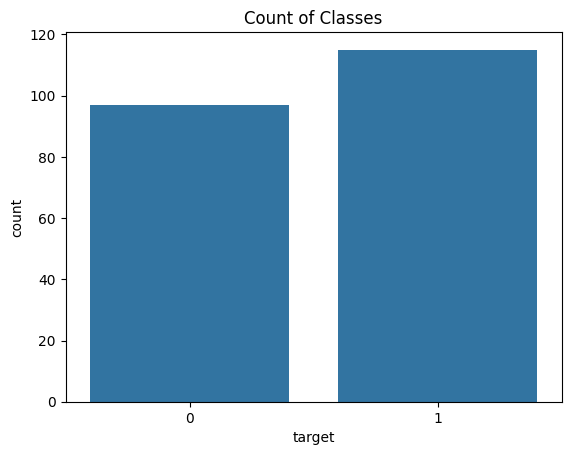

In [11]:
# Count number of classes

print("\n Count of classes")
print(df['target'].value_counts())

plt.title("Count of Classes")
sns.countplot(x = 'target', data = df)
plt.show()

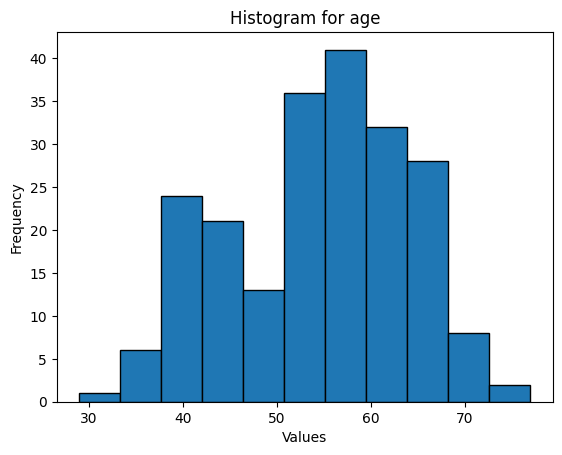

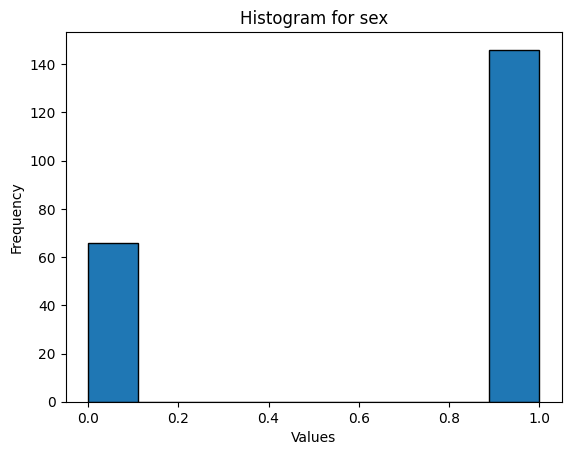

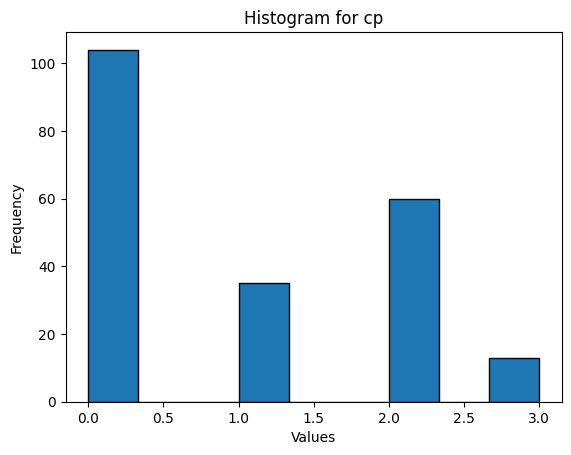

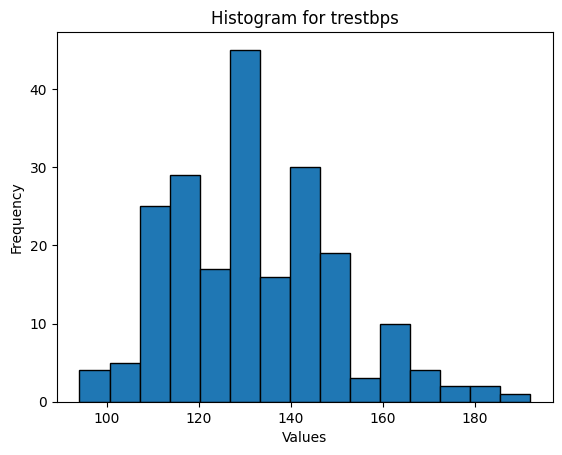

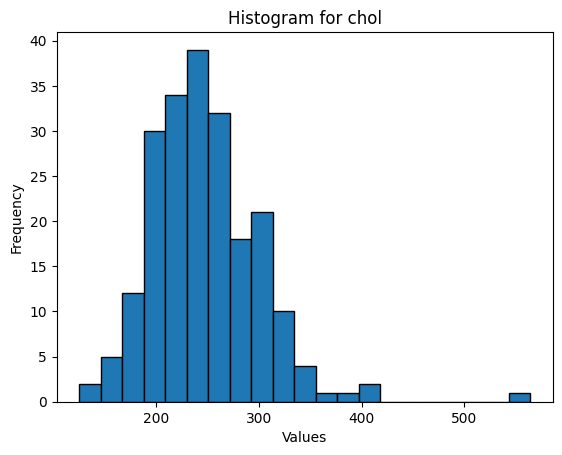

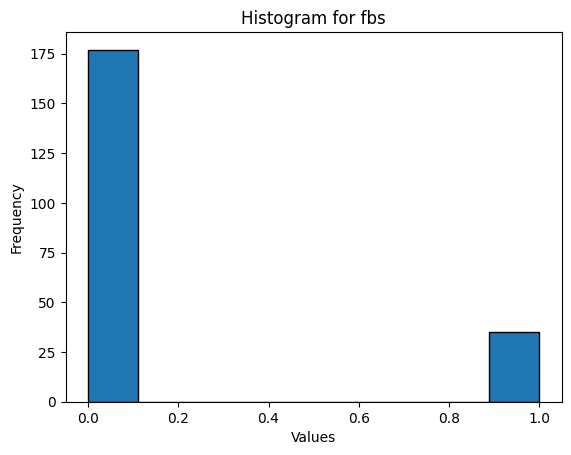

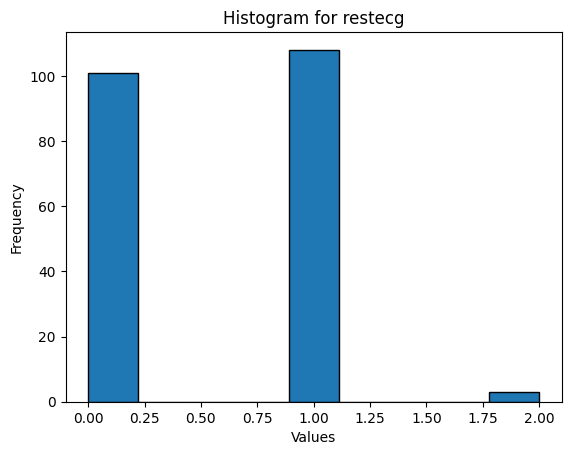

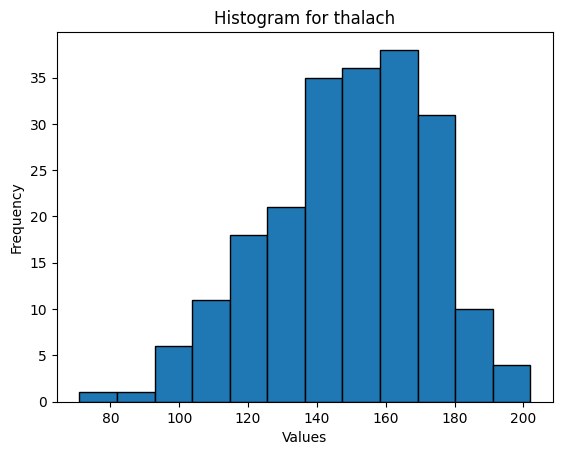

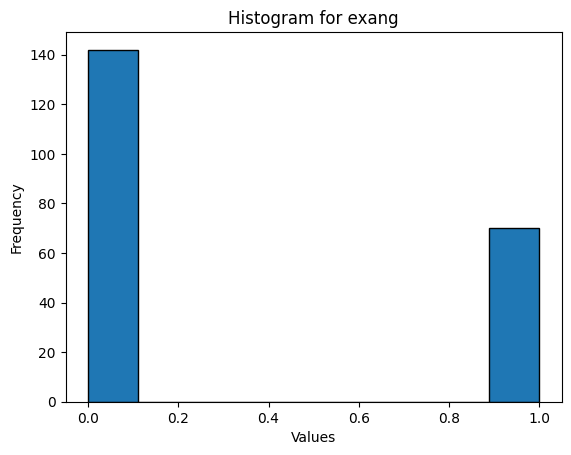

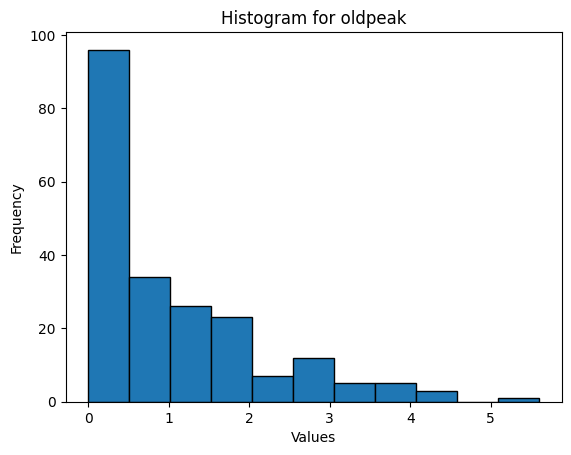

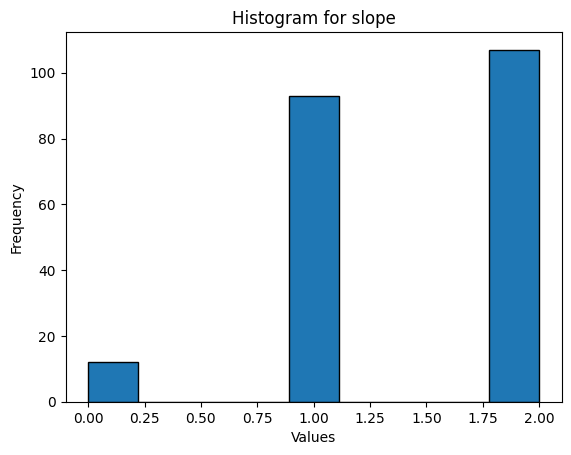

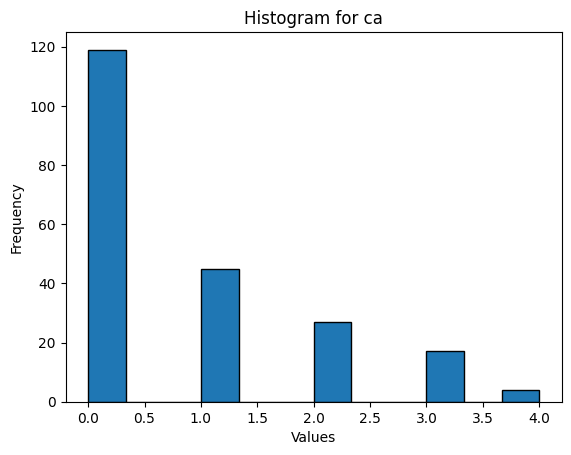

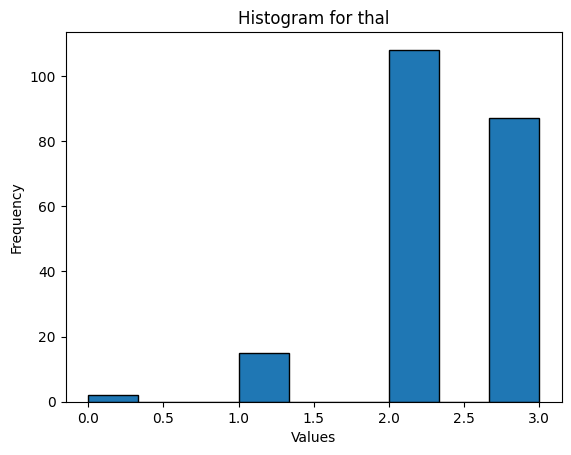

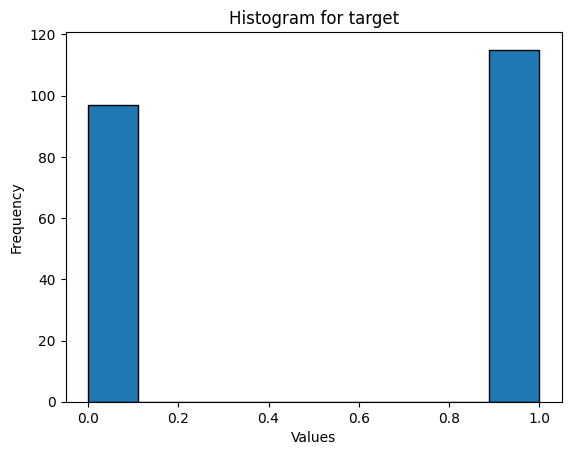

In [12]:
# Create histograms for each columns

for column in df.columns:
    plt.hist(df[column], bins='auto', edgecolor='black')
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.title(f'Histogram for {column}')
    plt.show()

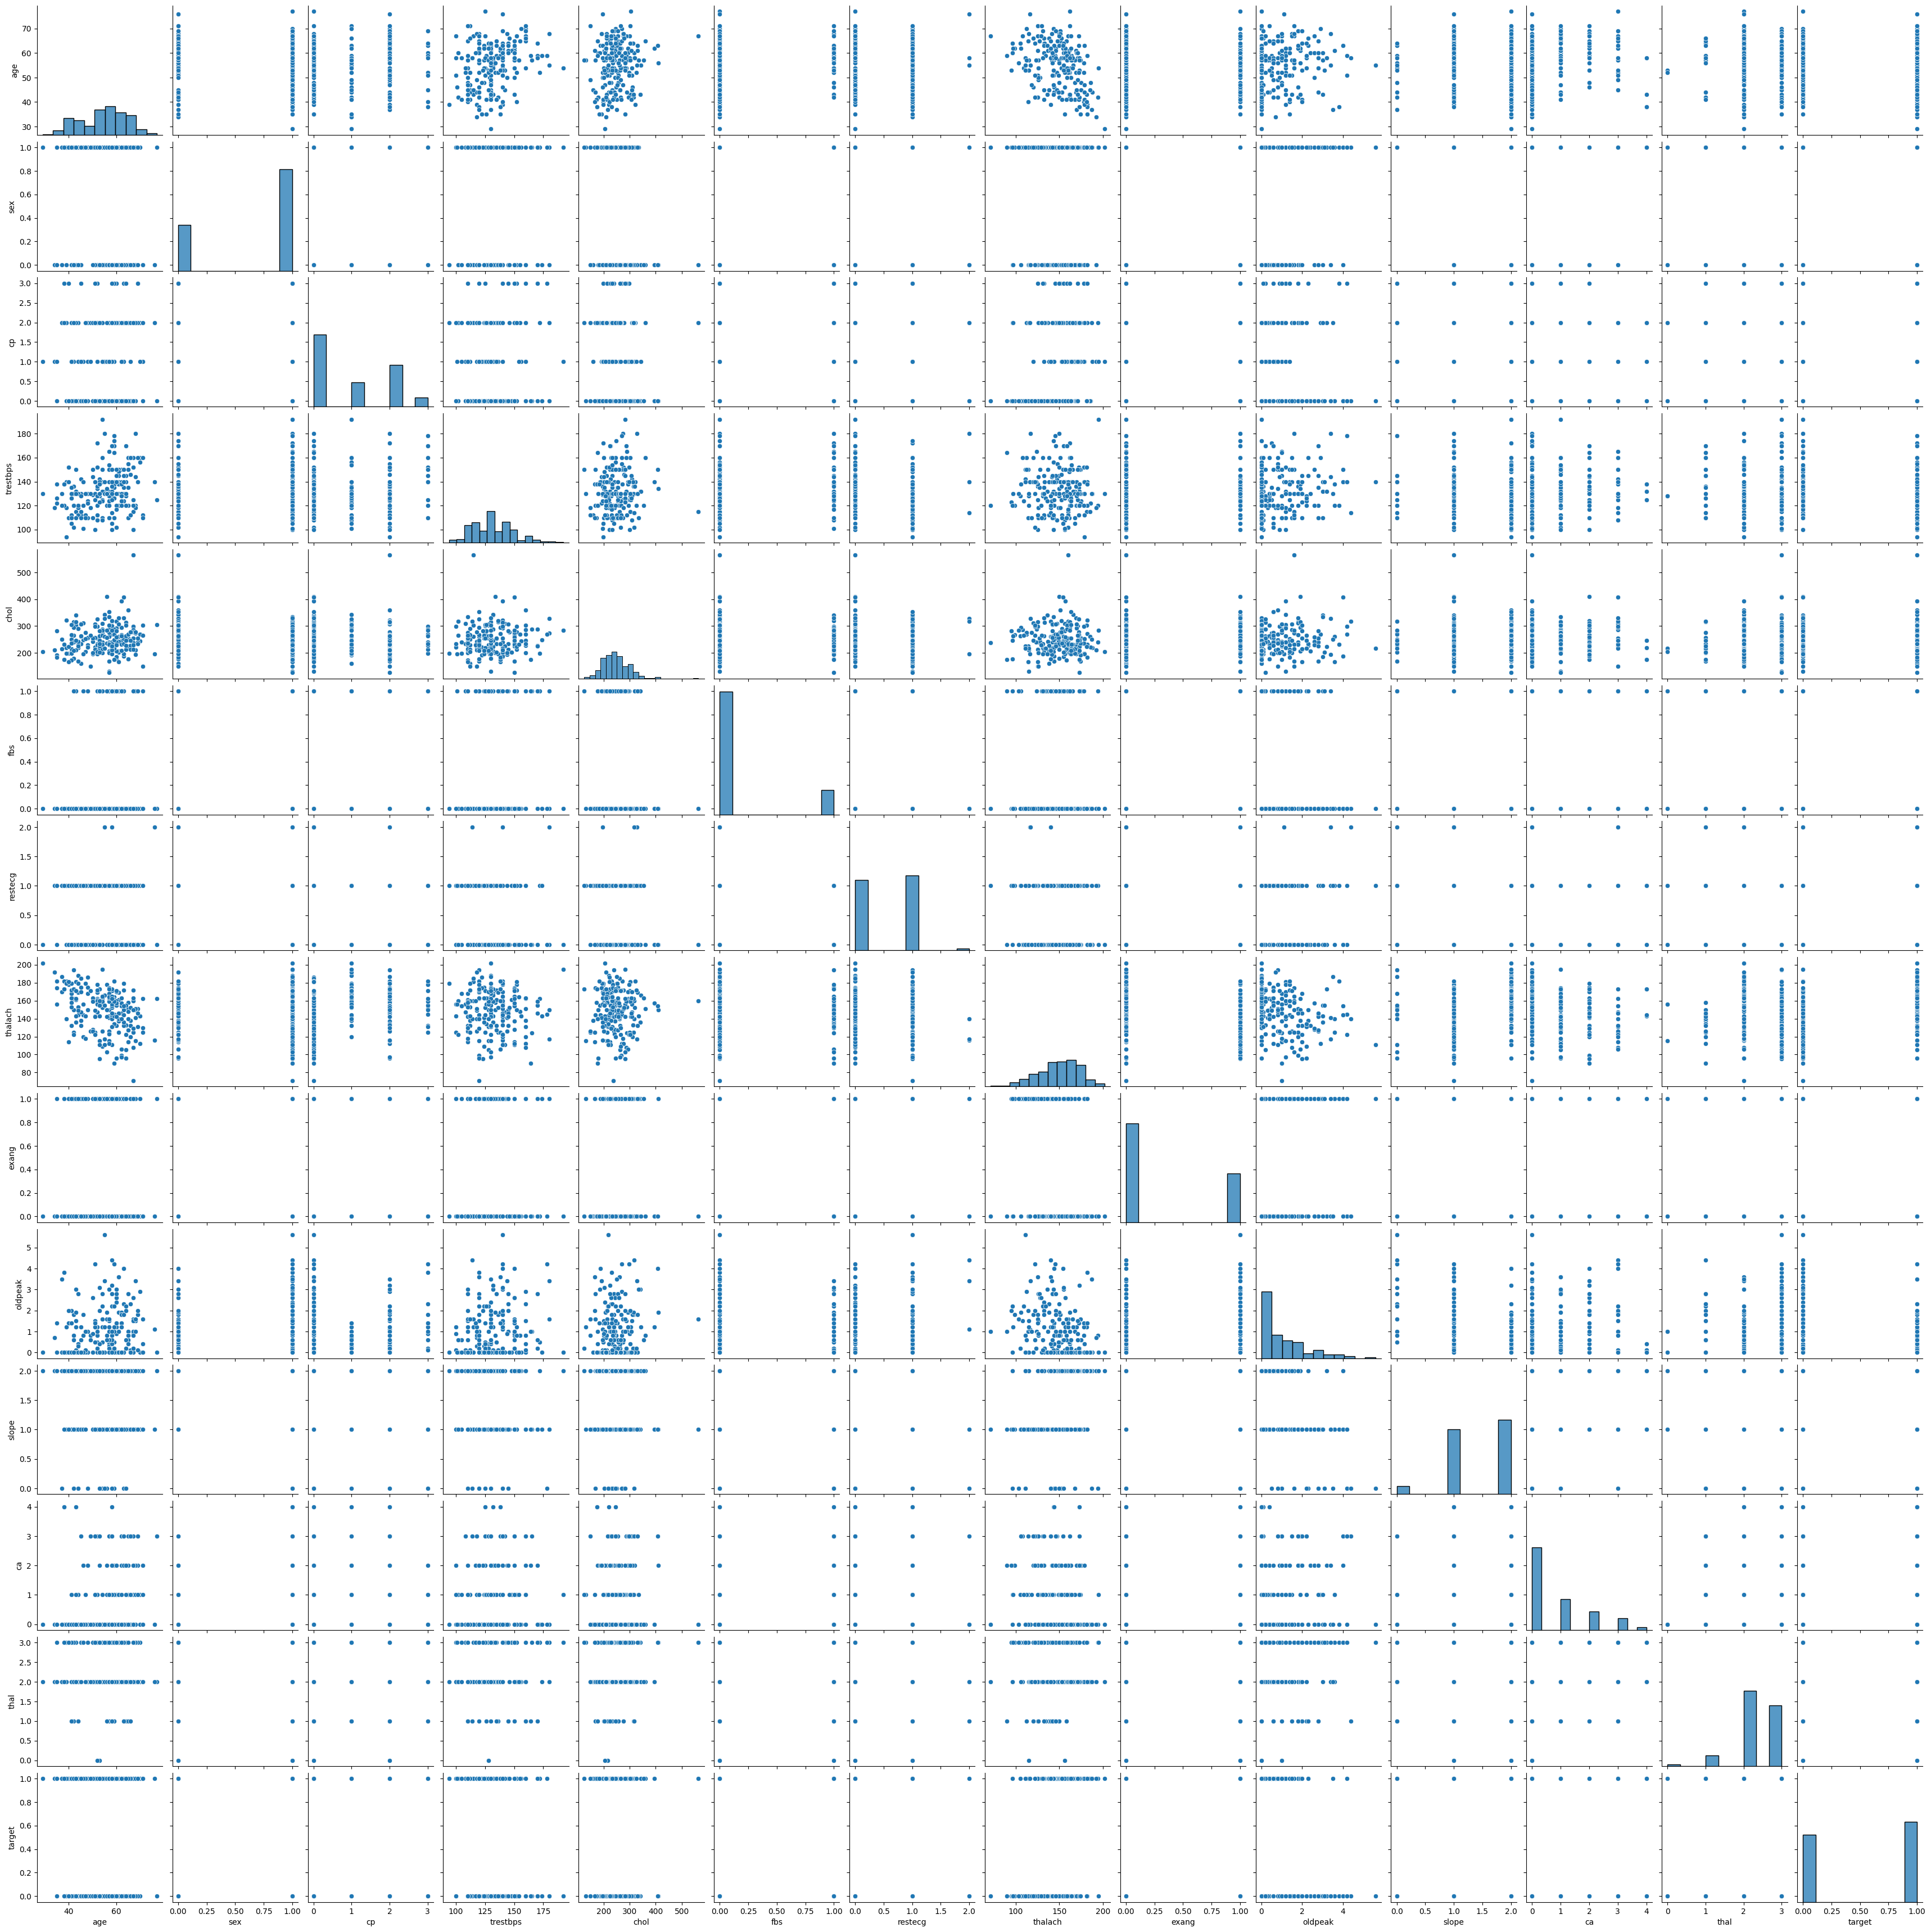

In [13]:
# Pairplot for each variable

sns.pairplot(df)

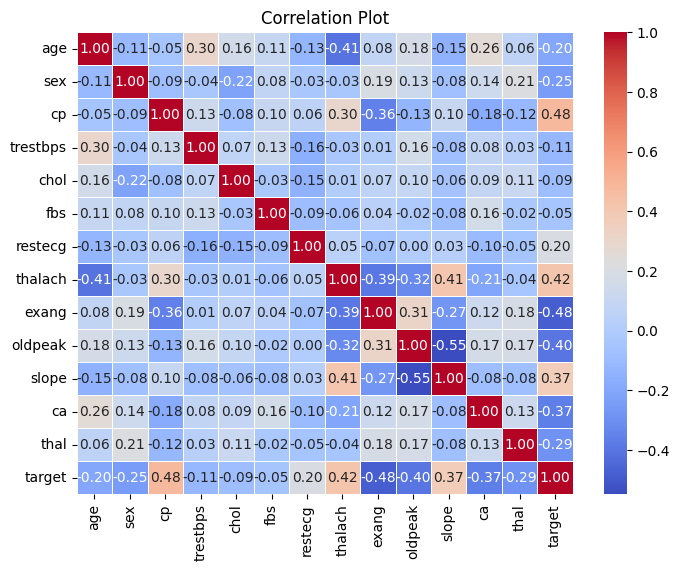

In [14]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Plot')
plt.show()

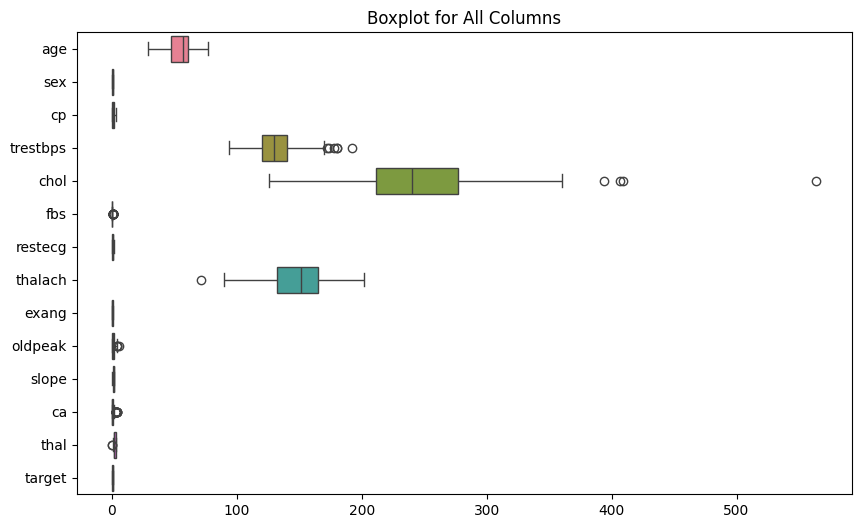

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, orient='h')  # 'h' for horizontal orientation
plt.title('Boxplot for All Columns')
plt.show()

In [16]:
# Scaling the data for standardisation

scaler = StandardScaler()
df_standardized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)


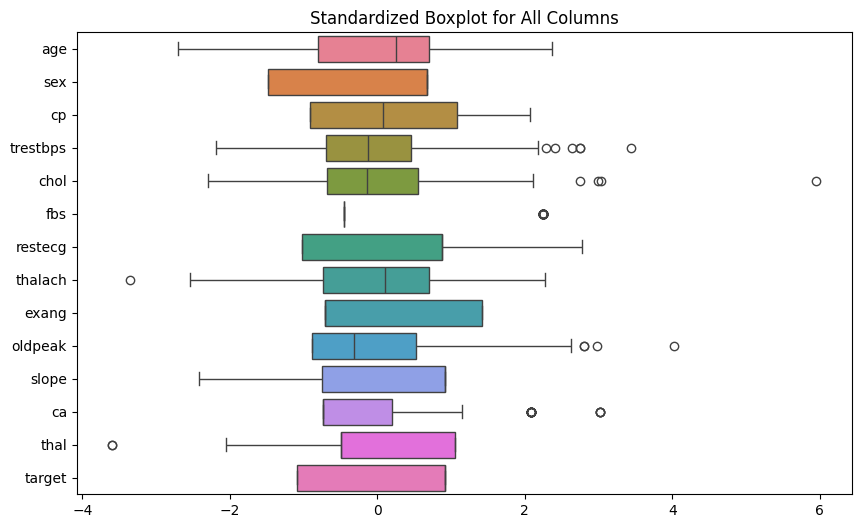

In [17]:
# Create boxplot using Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_standardized, orient='h')  # 'h' for horizontal orientation
plt.title('Standardized Boxplot for All Columns')
plt.show()

In [18]:
from sklearn.preprocessing import OneHotEncoder


# From the dataset description, the following are categorical variables

cat_col = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

# Perform one-hot encoding
df_encoded = pd.get_dummies(df, columns=cat_col)


# Display the resulting DataFrame
print(df_encoded)

     age  trestbps  chol  thalach  oldpeak  ca  target  sex_0  sex_1  cp_0  \
0     48       124   255      175      0.0   2       1      0      1     0   
1     68       120   211      115      1.5   0       1      1      0     0   
2     46       120   249      144      0.8   0       0      0      1     1   
3     60       130   253      144      1.4   1       0      0      1     1   
4     43       115   303      181      1.2   0       1      0      1     1   
..   ...       ...   ...      ...      ...  ..     ...    ...    ...   ...   
207   67       120   229      129      2.6   2       0      0      1     1   
208   58       150   283      162      1.0   0       1      1      0     0   
209   60       145   282      142      2.8   2       0      0      1     1   
210   62       124   209      163      0.0   0       1      1      0     1   
211   58       170   225      146      2.8   2       0      1      0     1   

     ...  restecg_2  exang_0  exang_1  slope_0  slope_1  slope_

In [19]:
df_encoded.columns

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca', 'target',
       'sex_0', 'sex_1', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'fbs_0', 'fbs_1',
       'restecg_0', 'restecg_1', 'restecg_2', 'exang_0', 'exang_1', 'slope_0',
       'slope_1', 'slope_2', 'thal_0', 'thal_1', 'thal_2', 'thal_3'],
      dtype='object')

In [20]:
# Separate dataset into target and features

X = df_encoded.drop('target', axis = 1)
y = df_encoded['target']

In [21]:
X.columns = X.columns.astype(str)

In [22]:
# Scale data as they are all measured on different metrics

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [23]:
#Split dataset into training and testing datasets

X_train, X_valid, y_train, y_valid = train_test_split(X_scaled, y, test_size = 0.2, random_state = 261)


In [24]:
X_train.shape


(169, 26)

#**Task 2**

In [25]:
rf_classifier = RandomForestClassifier(random_state = 261)

In [26]:
#### NOW FOR SCORING F1-SCORE

In [27]:
# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create GridSearchCV
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='f1')

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best estimator from the grid search
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Make predictions on the test set using the best estimator
y_pred = best_estimator.predict(X_valid)

In [28]:
# Evaluate the model
f1 = f1_score(y_valid, y_pred)
print(f"Best Parameters: {best_params}")
print(f"F1-score with Best Estimator: {f1:.4f}")


Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
F1-score with Best Estimator: 0.8182


In [29]:
# Display additional evaluation metrics
print("\nClassification Report:")
print(classification_report(y_valid, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.81      0.81        21
           1       0.82      0.82      0.82        22

    accuracy                           0.81        43
   macro avg       0.81      0.81      0.81        43
weighted avg       0.81      0.81      0.81        43




Confusion Matrix:
[[17  4]
 [ 4 18]]


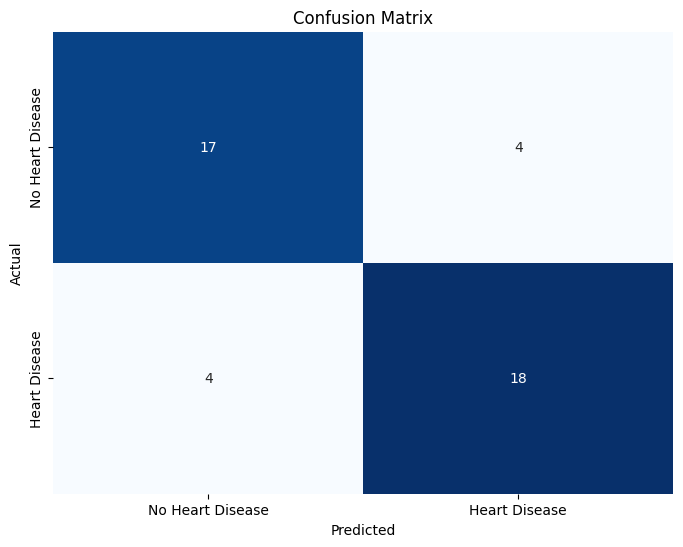

In [30]:
# Print the confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_valid, y_pred))

cm = confusion_matrix(y_valid, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Heart Disease', 'Heart Disease'], yticklabels=['No Heart Disease', 'Heart Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [31]:
# Evaluate the model
accuracy = accuracy_score(y_valid, y_pred)
recall = recall_score(y_valid, y_pred)
precision = precision_score(y_valid, y_pred)
f1 = f1_score(y_valid, y_pred)

print(f"Best Parameters: {best_params}")
print(f"Accuracy with Best Estimator: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1:.4f}")

Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
Accuracy with Best Estimator: 0.8140
Recall: 0.8182
Precision: 0.8182
F1 Score: 0.8182


# **Task 3**


In [115]:
model = grid_search.best_estimator_

In [116]:
# %% Create SHAP explainer
explainer = shap.TreeExplainer(model)

# Calculate shapley values for test data
start_index = 0
end_index = len(X_valid) + 1
shap_values = explainer.shap_values(X_valid[start_index:end_index])
X_valid[start_index:end_index]



(43, 26)


In [117]:
feature_names = X.columns

In [119]:
# What is the f(x) threshold for the rf to predict heart disease as 1?

explainer.expected_value[1]

0.5605917159763313

In [36]:
# %% >> Visualize global predictions for the model
shap.initjs()
# Force plot
prediction = model.predict(X_valid[start_index:end_index])[0]
print(f"The RF predicted: {prediction}")
shap.force_plot(explainer.expected_value[1],
                shap_values[1],
                X_valid[start_index:end_index], feature_names = feature_names) # for values


The RF predicted: 0


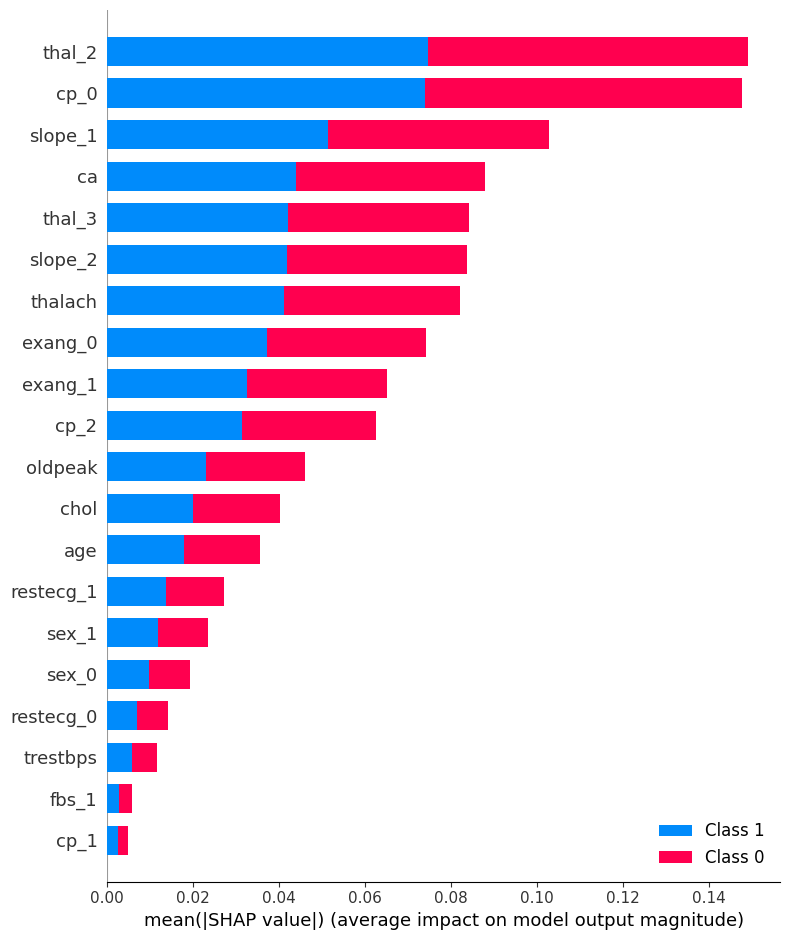

In [122]:
# %% >> Visualize global features
# Feature summary
shap.summary_plot(shap_values, X_valid, feature_names = feature_names)

# **Task 4**

In [123]:
test_encoded = pd.get_dummies(test, columns = cat_col)
test_encoded.shape

(91, 25)

In [124]:
test_encoded['thal_0'] = 0
test_encoded.shape

(91, 26)

In [125]:
dropped_cols = test_encoded[['thal_1', 'thal_2', 'thal_3']]
test_encoded = test_encoded.drop(['thal_1', 'thal_2', 'thal_3'], axis = 1)
test_encoded = pd.concat([test_encoded, dropped_cols], axis = 1)
test_encoded.shape

(91, 26)

In [126]:
test_scaled = scaler.fit_transform(test_encoded)
X_test = test_scaled

In [127]:
# %% Create SHAP explainer
explainer1 = shap.TreeExplainer(model)
# Calculate shapley values for test data
start_index1 = 0
end_index1 = start_index1 + 1


In [128]:
shap_values1 = explainer1.shap_values(X_test[start_index1:end_index1])
print(shap_values1[0].shape)

(1, 26)


In [136]:
explainer1.expected_value[1]

0.5605917159763313

In [130]:
feature_names = test_encoded.columns

The RF predicted: 0


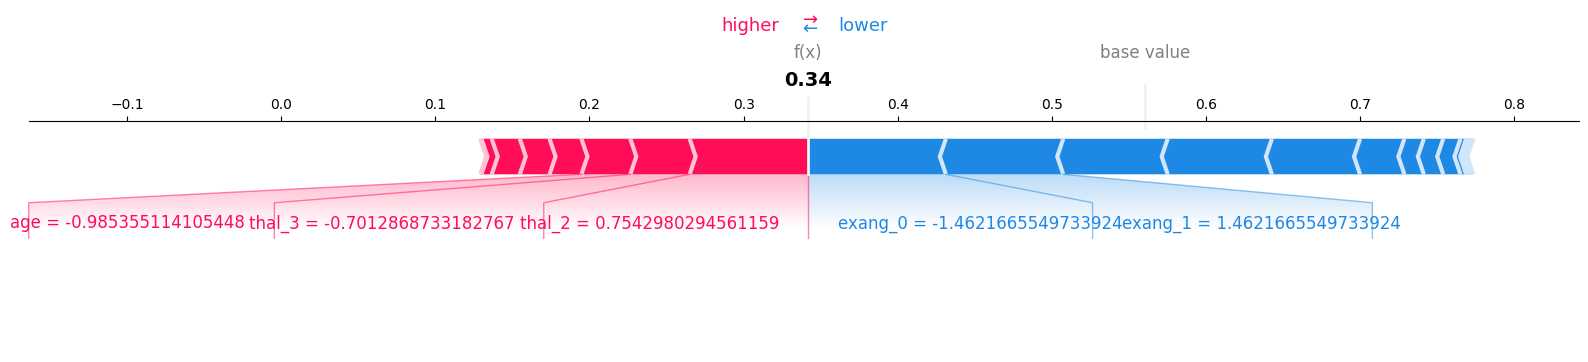

In [137]:
# %% >> Visualize global predictions for the model
shap.initjs()
# Force plot
prediction = model.predict(X_test[start_index1:end_index1])[0]
print(f"The RF predicted: {prediction}")
shap.force_plot(explainer1.expected_value[1],
                shap_values1[1],
                X_test[start_index1:end_index1], matplotlib = True, feature_names = feature_names) # for values


# **Task 5**

In [47]:
# %% Create SHAP explainer
explainer2 = shap.TreeExplainer(model)
# Calculate shapley values for test data
start_index2 = 0
end_index2 = len(X_test) + 1


In [48]:
shap_values2 = explainer2.shap_values(X_test[start_index2:end_index2])
print(shap_values2[0].shape)

(91, 26)


In [49]:
print(explainer2.expected_value[1])

0.5605917159763313


In [50]:
# %% >> Visualize global predictions for the model
shap.initjs()
# Force plot
prediction = model.predict(X_test[start_index2:end_index2])[0]
print(f"The RF predicted: {prediction}")
shap.force_plot(explainer2.expected_value[1],
                shap_values2[1],
                X_test[start_index2:end_index2], feature_names = feature_names) # for values


The RF predicted: 0


# **Task 6**

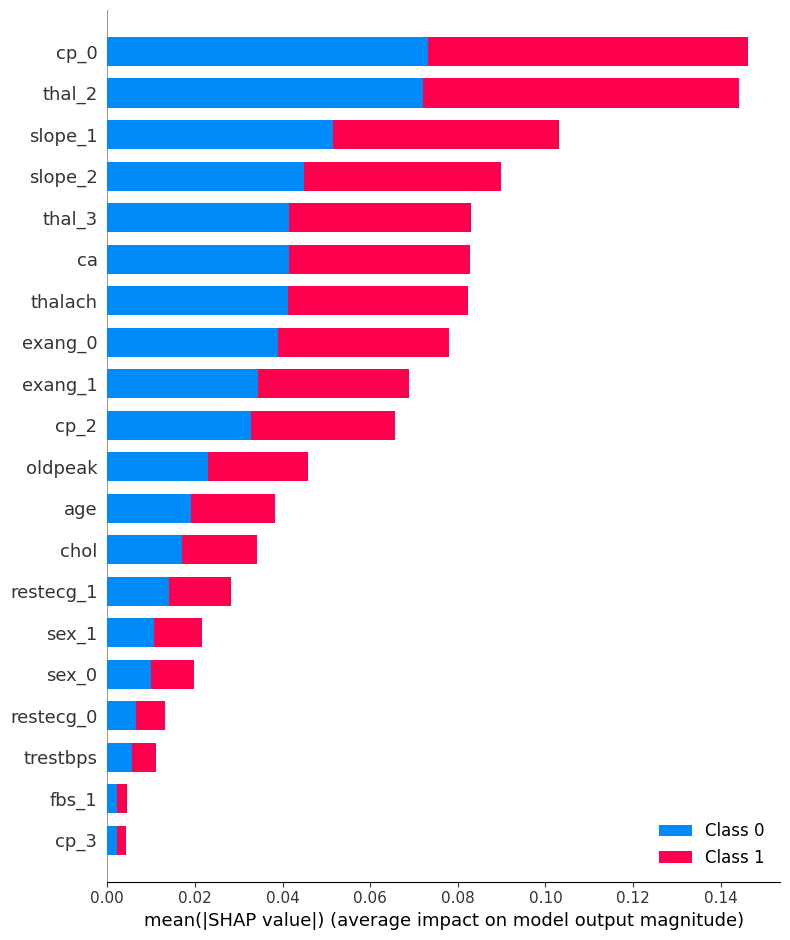

In [51]:
# %% >> Visualize global features
# Feature summary
shap.summary_plot(shap_values2, X_test, feature_names = feature_names)

# **Task 7**

In [52]:
# %% Create SHAP explainer
explainer2 = shap.TreeExplainer(model)
# Calculate shapley values for test data
start_index2 = 0
end_index2 = len(X_test) + 1
shap_values2 = explainer2.shap_values(X_test[start_index2:end_index2])

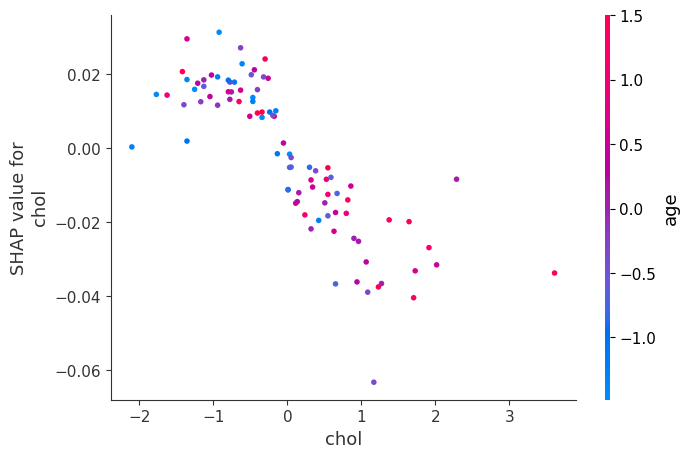

In [65]:
shap.dependence_plot(2, shap_values2[1], X_test, feature_names = feature_names, interaction_index = 0)


# **Task 8**

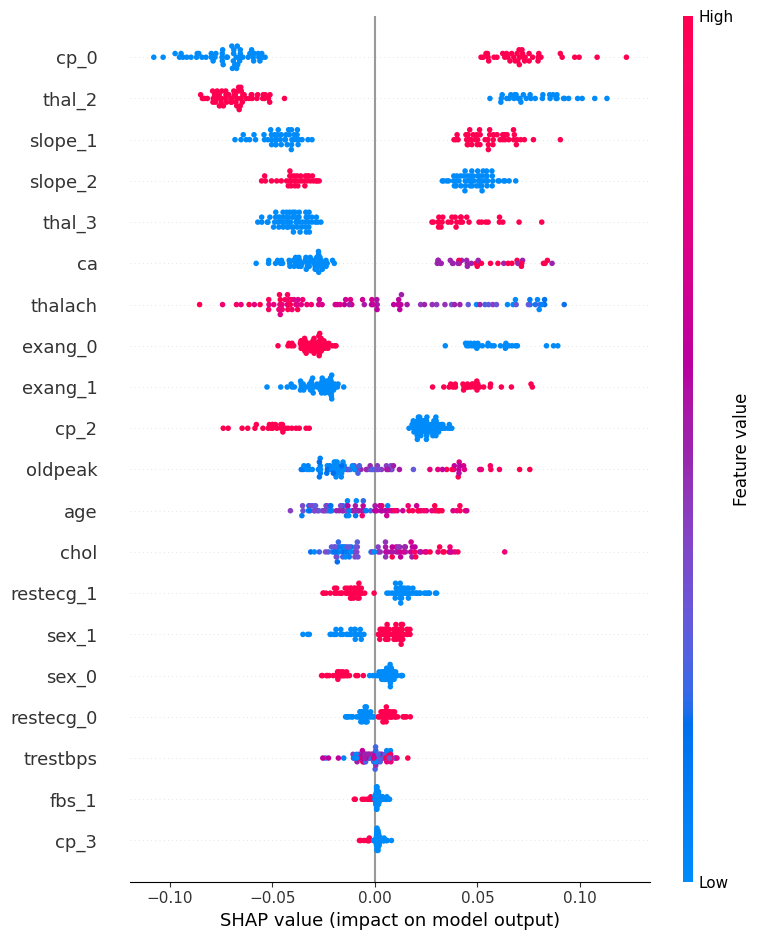

In [112]:
# Creating a SHAP summary plot

shap.summary_plot(shap_values2[0], X_test, feature_names = feature_names)

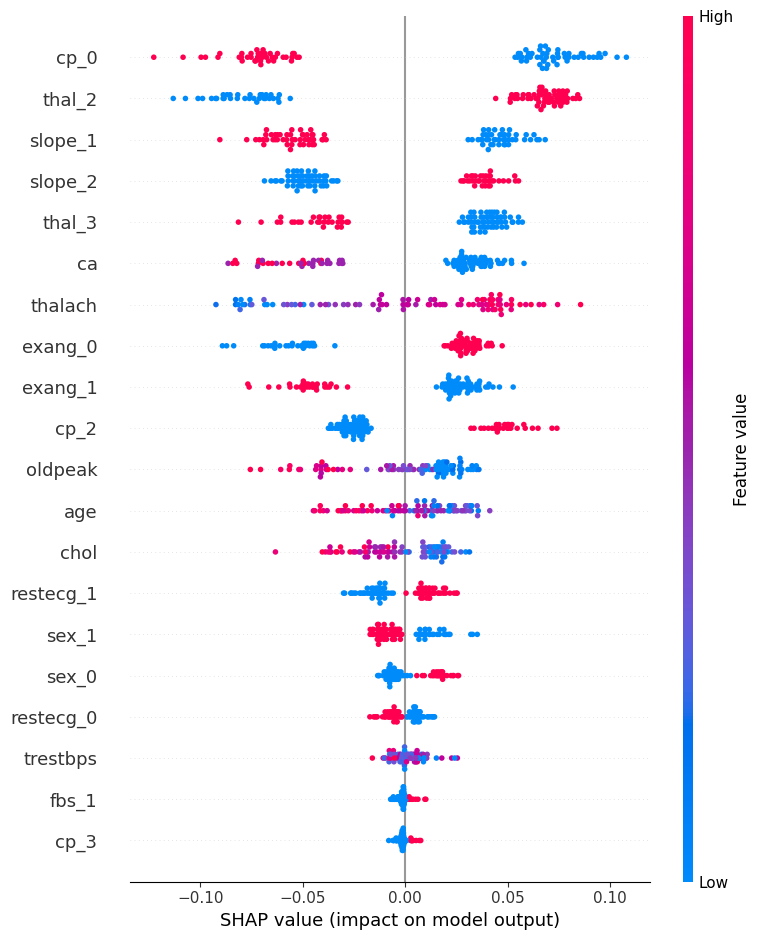

In [113]:
shap.summary_plot(shap_values2[1], X_test, feature_names = feature_names)

In [71]:
test_encoded.columns

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca', 'sex_0', 'sex_1',
       'cp_0', 'cp_1', 'cp_2', 'cp_3', 'fbs_0', 'fbs_1', 'restecg_0',
       'restecg_1', 'restecg_2', 'exang_0', 'exang_1', 'slope_0', 'slope_1',
       'slope_2', 'thal_0', 'thal_1', 'thal_2', 'thal_3'],
      dtype='object')

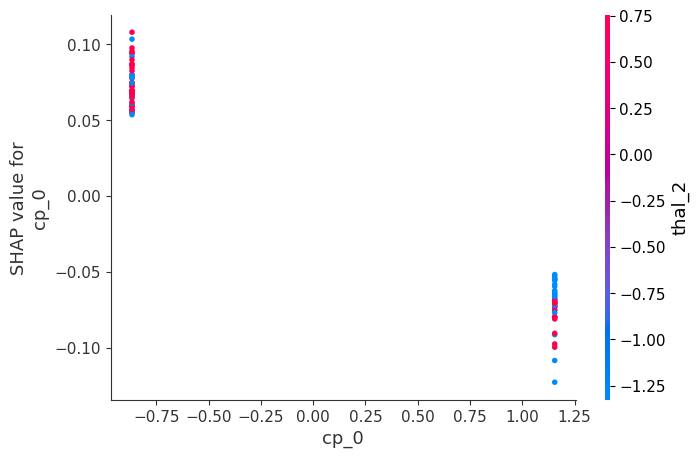

In [138]:
# dependence plot cp_0, with thal_2 interaction effects
shap.dependence_plot(8, shap_values2[1], X_test, feature_names = feature_names, interaction_index = 24)


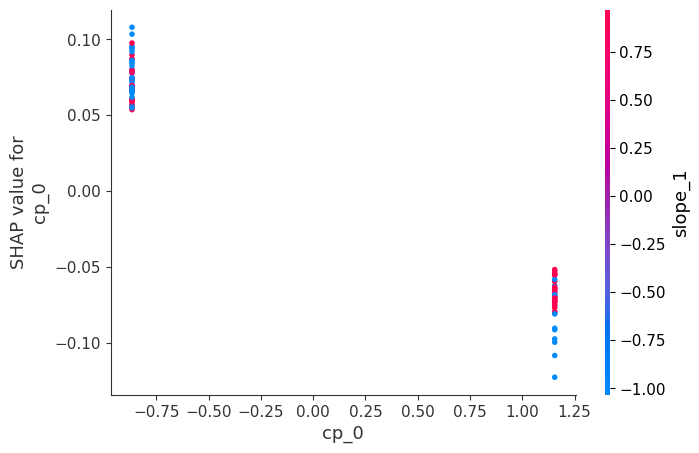

In [139]:
# dependence plot for cp_0, with interaction effects slope 1
shap.dependence_plot(8, shap_values2[1], X_test, feature_names = feature_names, interaction_index = 20)
